In [1]:
from __future__ import division, print_function
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from astropy.table import Table
from astropy.io import fits

In [2]:
cat = Table(fitsio.read('tycho2-isgalaxyflag-2mass.kd.fits'))
print(len(cat))

2557501


In [3]:
cat[:5]

TYC1,TYC2,TYC3,RA,DEC,MEAN_RA,MEAN_DEC,SIGMA_RA,SIGMA_DEC,PM_RA,PM_DEC,SIGMA_PM_RA,SIGMA_PM_DEC,EPOCH_RA,EPOCH_DEC,MAG_BT,MAG_VT,MAG_HP,ISGALAXY,Jmag,Hmag,Kmag
int16,int16,uint8,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float32
7319,464,1,225.92553083,-35.26915361,225.92551424,-35.26913756,1.2611111e-05,1.4527778e-05,-0.006,0.0069,0.0024,0.0025,1991.74,1991.57,11.31,10.83,0.0,0,99.0,99.0,99.0
7319,568,1,225.88642694,-35.33228306,225.88643859,-35.33228325,2.6527778e-05,3.1305557e-05,0.0039,1e-04,0.0025,0.0026,1991.77,1991.59,12.7,11.886,0.0,0,99.0,99.0,99.0
7319,493,1,225.82429694,-35.28876861,225.82425796,-35.28876213,1.9666666e-05,2.625e-05,-0.0141,0.0027,0.0028,0.0029,1991.76,1991.47,12.345,11.156,0.0,0,99.0,99.0,99.0
7319,764,1,225.7593425,-35.40424361,225.75933408,-35.40423965,2.338889e-05,2.9666666e-05,-0.0029,0.0019,0.0023,0.0025,1991.84,1991.54,12.23,11.97,0.0,0,99.0,99.0,99.0
7319,1003,1,225.67991028,-35.30822389,225.67992303,-35.30824594,1.1166667e-05,1.4027778e-05,0.0033,-0.0066,0.0019,0.0021,1991.77,1991.49,11.979,10.483,0.0,0,99.0,99.0,99.0


In [4]:
from astropy import units as u
from astropy.coordinates import SkyCoord

# Get Galactic Coordinates
c = SkyCoord(cat['RA'], cat['DEC'], frame='icrs', unit='deg')
c_new = c.galactic
l, b = np.array(c_new.l), np.array(c_new.b)

In [5]:
mask = (cat['DEC']>-25.) & (np.abs(b)>10)
mask1 = mask & (cat['Jmag']!=99)
print('Fraction of Tycho-2 objects matched to 2MASS (within smaller 2MASS footprint):')
print(np.sum(mask1)/np.sum(mask))

Fraction of Tycho-2 objects matched to 2MASS (within smaller 2MASS footprint):
0.6598273073813099


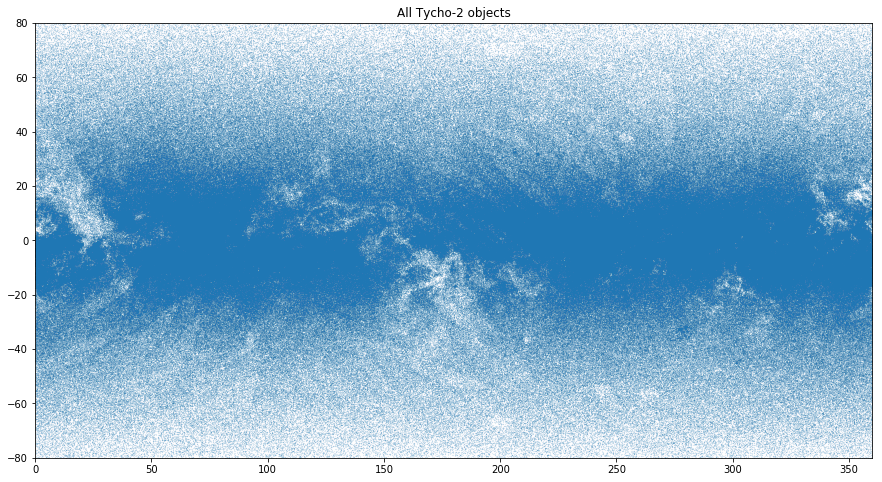

In [6]:
plt.figure(figsize=(15, 8))
plt.plot(l, b, '.', markersize=0.1)
plt.axis([0, 360, -80, 80])
plt.title('All Tycho-2 objects')
plt.show()

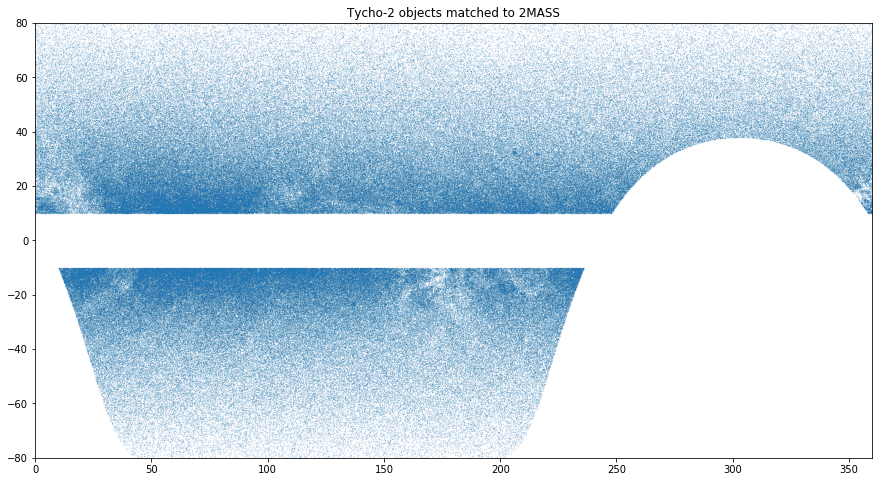

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(l[mask1], b[mask1], '.', markersize=0.1)
plt.axis([0, 360, -80, 80])
plt.title('Tycho-2 objects matched to 2MASS')
plt.show()

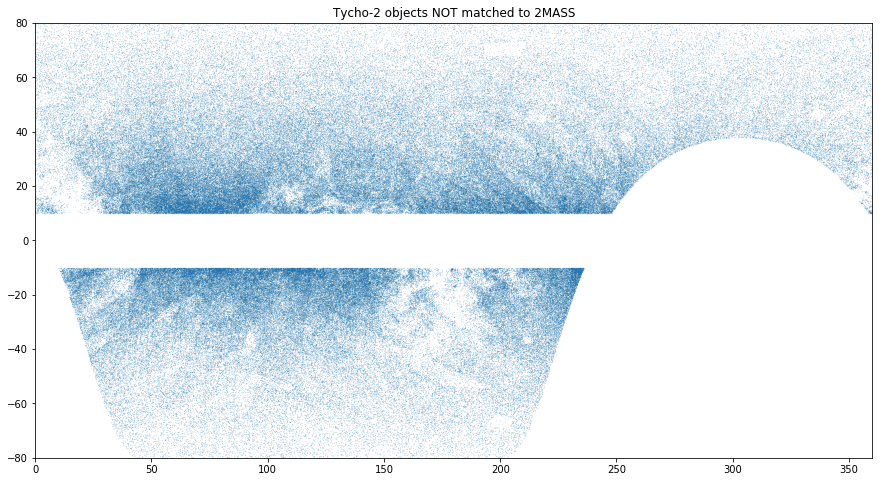

In [10]:
plt.figure(figsize=(15, 8))
plt.plot(l[(~mask1) & (mask)], b[(~mask1) & (mask)], '.', markersize=0.1)
plt.axis([0, 360, -80, 80])
plt.title('Tycho-2 objects NOT matched to 2MASS')
plt.show()